# Calibration of the moisture sensor readings with different ML MODELS
### Grain Data

#### Following ML Models are used:
 1. MLR
 2. Ridge Regression
 3. Lasso Regression
 4. Support Vector Mechanism Regression
 5. KNN
 6. Random Forest
 7. ANN
 8. Ensemble
 9. Gaussian Process
 10. Kernel Regression

##### Workflow:
Machine Learning for Light Sensor Calibration (Yichao Zhang * , Lakitha O. H. Wijeratne , Shawhin Talebi and David J. Lary)
##### Reference Study:
1. https://github.com/marcelcases/calibration-sensors-machine-learning
2. https://github.com/yichigo/Light-Sensors-Calibration/blob/master/model_MLP_whole.ipynb


In [2]:
# Libraries

import pandas as pd
import numpy as np
import os
import sys
import datetime
import time
from pandas import Series
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler,Normalizer
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, r2_score
from sklearn.feature_selection import mutual_info_regression

from sklearn.decomposition import PCA, FastICA
from sklearn.random_projection import GaussianRandomProjection
import pickle

from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
# Graph Libraries
import seaborn as sns

In [4]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Performance Measures FUNCTION

def loss_functions(y_true, y_pred):
    print("Loss functions:")
    print("* R-squared =", r2_score(y_true, y_pred))
    print("* RMSE =", mean_squared_error(y_true, y_pred))
    print("* MAE =", mean_absolute_error(y_true, y_pred))

# DATA

In [5]:
df=pd.read_csv(r"C:\\Users\\bkari\\Desktop\\complete_data.csv")

In [6]:
# Drop of the Index column
df=df.iloc[:,1:]

In [7]:
df.columns

Index(['RefSt', 'Sensor', 'Gewicht', 'Raw_Feucht', 'Temp_grain',
       'SommerDurumweizen', 'SommerGerste', 'Weizen', 'WinterDurumweizen',
       'WinterGerste', 'WinterRaps', 'WinterRoggen', 'WinterTriticale',
       'WinterWeizen'],
      dtype='object')

### Workflow Design

In [27]:
# Selecting Feutures i.e X i.e Independent Variables

features=df[['Sensor','Gewicht', 'Raw_Feucht', 'Temp_grain', 'SommerDurumweizen', 'SommerGerste', 'Weizen', 'WinterDurumweizen',
             'WinterGerste', 'WinterRaps', 'WinterRoggen', 'WinterTriticale', 'WinterWeizen']]

In [9]:
#try



In [85]:
X=features
#X['Sensor_2']=np.square(X['Sensor'])

In [86]:
# Selecting Target Variable i.e Y i.e Dependent Variable
targets=df[['RefSt']]
Y=targets
#Y=np.round(targets,1)
#Y
#Y=np.round(Y,1) # DELETE
#Y

In [87]:
# Split the Data in Training and Test Set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [88]:
# Scale the Data with Standard Scaler
scaler_x = StandardScaler()
X_train_scaled = scaler_x.fit_transform(X_train)
X_test_scaled = scaler_x.transform(X_test)

scaler_y = StandardScaler()
Y_train_scaled = scaler_y.fit_transform(Y_train)
Y_test_scaled = scaler_y.transform(Y_test)

In [89]:
# Input Feutures PCA
RANDOM_STATE=42
pca1 = PCA(n_components=13, random_state = RANDOM_STATE)
X_temp = pca1.fit_transform(X_train_scaled[:,:])
print(pca1.explained_variance_)

[3.33318316e+00 1.59943227e+00 1.48977696e+00 1.22587963e+00
 1.13860334e+00 1.08879105e+00 1.06285465e+00 1.02072226e+00
 8.58104472e-01 6.47801397e-01 5.10628839e-01 2.36592138e-02
 2.68429220e-03]


In [39]:
#pd.DataFrame(X_temp).describe()

In [90]:
# PCA
n_components = 13

DR = 'PCA'
Cluster = 'None'
pca = PCA(n_components=n_components, random_state = RANDOM_STATE)

X_train_scaled_DR = pca.fit_transform(X_train_scaled)
X_test_scaled_DR = pca.transform(X_test_scaled)

X_train_scaled_DR = pd.DataFrame(X_train_scaled_DR)
X_test_scaled_DR = pd.DataFrame(X_test_scaled_DR)
print(pca.explained_variance_)

# save pca model
dir_DR = '../models/'
if not os.path.exists(dir_DR):
    os.mkdir(dir_DR)

fn_DR = dir_DR + DR + '.sav'
pickle.dump(pca, open(fn_DR, 'wb'))

[3.33318316e+00 1.59943227e+00 1.48977696e+00 1.22587963e+00
 1.13860334e+00 1.08879105e+00 1.06285465e+00 1.02072226e+00
 8.58104472e-01 6.47801397e-01 5.10628839e-01 2.36592138e-02
 2.68429220e-03]


In [91]:
## scale the data again before NN
scaler_x2 = StandardScaler()
X_train_scaled_DR_scaled = scaler_x2.fit_transform(X_train_scaled_DR)
X_test_scaled_DR_scaled = scaler_x2.transform(X_test_scaled_DR)

In [92]:
#****DataFrame for storing the ML Model results!

df_test=pd.DataFrame()
df_test['REAL']=Y_test_scaled.flatten()

In [93]:
Y_test_scaled

array([[-0.86913561],
       [-0.81175763],
       [-0.53530013],
       ...,
       [ 0.55488135],
       [-0.07627635],
       [ 0.01761488]])

# ML Calibration Models

#### Multiple Linear Regression with Stochastic Gradient Descend (SGD)

In [94]:
#Model
sgdr = SGDRegressor(loss = 'squared_loss', max_iter = 5)

In [95]:
#Model FIT

sgdr.fit(X_train_scaled_DR_scaled, Y_train_scaled)

C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1208: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDRegressor(max_iter=5)

In [96]:
#Model Coefficients

print('Intercept: \n', sgdr.intercept_)
print('Coefficients: \n', sgdr.coef_)
print('Iters: \n', sgdr.n_iter_)
print(sgdr.get_params())


Intercept: 
 [0.00478829]
Coefficients: 
 [ 0.78599151 -0.03152937  0.08065083 -0.17318668 -0.01862265 -0.08908062
  0.08320392 -0.00811202 -0.01849319  0.2316192  -0.07525412 -0.09642657
  0.10955259]
Iters: 
 5
{'alpha': 0.0001, 'average': False, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.01, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'invscaling', 'loss': 'squared_loss', 'max_iter': 5, 'n_iter_no_change': 5, 'penalty': 'l2', 'power_t': 0.25, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [97]:
#Predict on Test

df_test["MLR_SGD_Pred"] = sgdr.predict(X_test_scaled_DR_scaled)

In [98]:
df_test["MLR_SGD_Pred"]

0      -0.477090
1      -0.025257
2      -0.105229
3      -3.121988
4      -0.539049
          ...   
1646   -0.074299
1647    0.212479
1648    0.962463
1649   -0.032971
1650    0.459387
Name: MLR_SGD_Pred, Length: 1651, dtype: float64

In [100]:
# Performance ASSESMENT!

loss_functions(Y_test_scaled,df_test["MLR_SGD_Pred"])

Loss functions:
* R-squared = 0.7221741299852964
* RMSE = 0.29315971144997083
* MAE = 0.3637634001189782


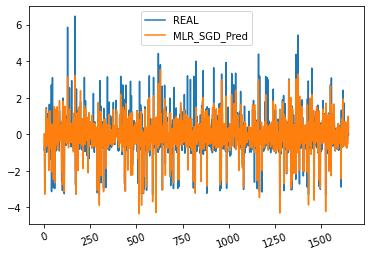

In [69]:
# Fast Check

df_test[["REAL","MLR_SGD_Pred"]].plot()

plt.xticks(rotation = 20)
plt.show()

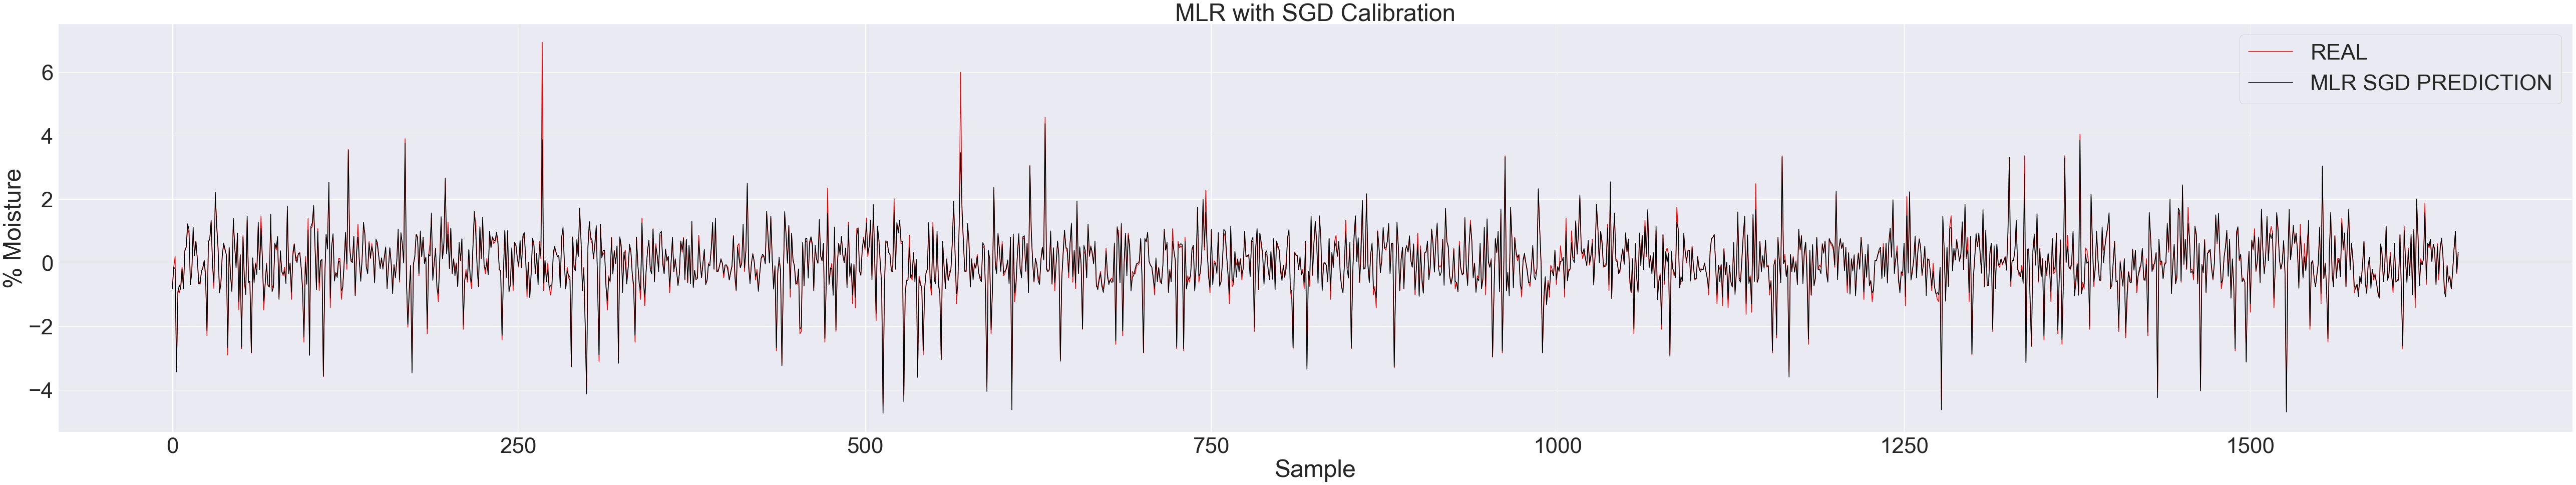

In [404]:
# Graph

sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'gray'})
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(90,15))
#ylim=(0,8251)
ax=sns.lineplot(y="REAL",x=range(0,1651) ,data=df_test, color="red") #REAL Values
sns.lineplot(y="MLR_SGD_Pred",x=range(0,1651),data=df_test, color="black").set(title='MLR with SGD Calibration') #Calibrated
plt.legend(labels = ['REAL', 'MLR SGD PREDICTION'])
ax.set(ylabel="% Moisture",xlabel="Sample")
plt.show()

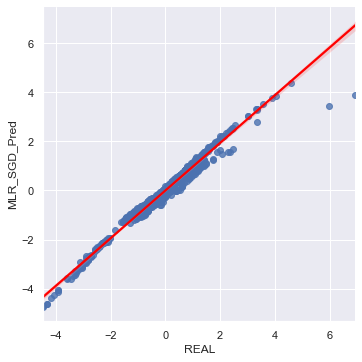

In [405]:
# Improved Scatter Plot

sns.set(font_scale=1)

sns.lmplot(x = 'REAL', y = 'MLR_SGD_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'red'})

plt.show()

#### KNN Regression

In [309]:
# Model
knn = KNeighborsRegressor(n_neighbors = 5)

In [310]:
# Fit
knn.fit(X_train_scaled_DR_scaled, Y_train_scaled)

KNeighborsRegressor()

In [204]:
# Predict
df_test["KNN_Pred"] = knn.predict(X_test_scaled_DR_scaled)

In [205]:
# Performance Assesment

loss_functions(df_test['REAL'],df_test['KNN_Pred'])

Loss functions:
* R-squared = 0.8555056222831051
* RMSE = 0.15246935094772193
* MAE = 0.2687586640541994


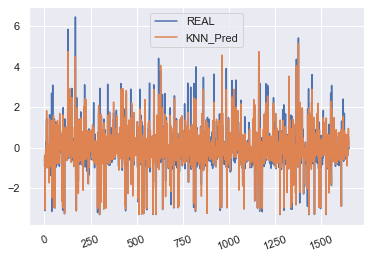

In [206]:
# Fast Check

df_test[["REAL","KNN_Pred"]].plot()

plt.xticks(rotation = 20)
plt.show()

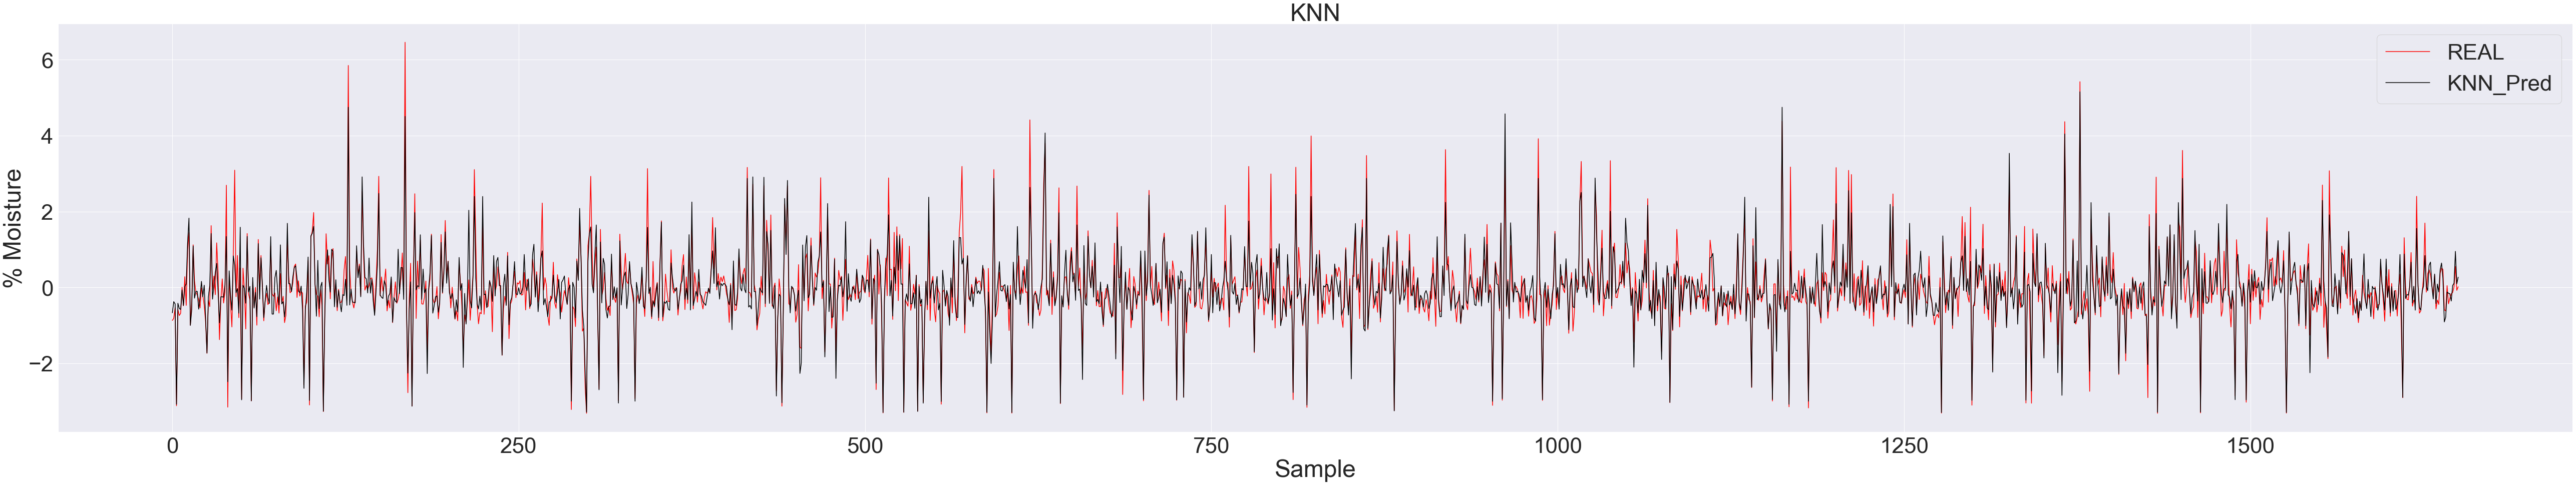

In [207]:
# Graph

sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'gray'})
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(90,15))
#ylim=(0,8251)
ax=sns.lineplot(y="REAL",x=range(0,1651) ,data=df_test, color="red") #REAL Values
sns.lineplot(y="KNN_Pred",x=range(0,1651),data=df_test, color="black").set(title='KNN') #Calibrated
plt.legend(labels = ['REAL', 'KNN_Pred'])
ax.set(ylabel="% Moisture",xlabel="Sample")
plt.show()

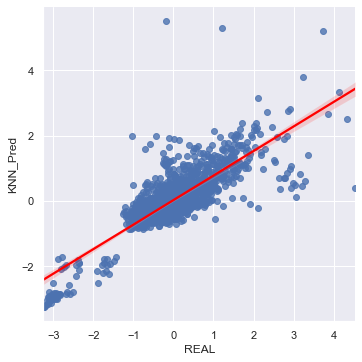

In [166]:
# Improved Scatter Plot

sns.set(font_scale=1)

sns.lmplot(x = 'REAL', y = 'KNN_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'red'})

plt.show()

#### Random Forest

In [208]:
# Model
rf = RandomForestRegressor(n_estimators = 5 ,random_state = 42)

In [209]:
# Fit
rf.fit(X_train_scaled_DR_scaled, Y_train_scaled)

<ipython-input-209-2c29c474f713>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train_scaled_DR_scaled, Y_train_scaled)


RandomForestRegressor(n_estimators=5, random_state=42)

In [210]:
# Predict
df_test["RF_Pred"] = rf.predict(X_test_scaled_DR_scaled)
print(df_test.head(5))

       REAL  MLR_SGD_Pred  KNN_Pred   RF_Pred
0 -0.869136     -0.461155 -0.667791 -0.674050
1 -0.811758      0.008527 -0.374642 -0.251540
2 -0.535300      0.125278 -0.433063  0.135501
3 -3.117309     -3.228218 -3.078709 -3.081839
4 -0.577030     -0.605828 -0.415328 -0.493571


In [211]:
# ASSESMENT

loss_functions(df_test['REAL'],df_test['RF_Pred'])

Loss functions:
* R-squared = 0.8469616183325741
* RMSE = 0.16148491790206104
* MAE = 0.2685931111789511


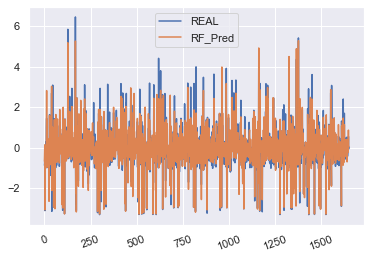

In [213]:
sns.set(font_scale=1)
df_test[["REAL", "RF_Pred"]].plot()
plt.xticks(rotation = 20)
plt.show()

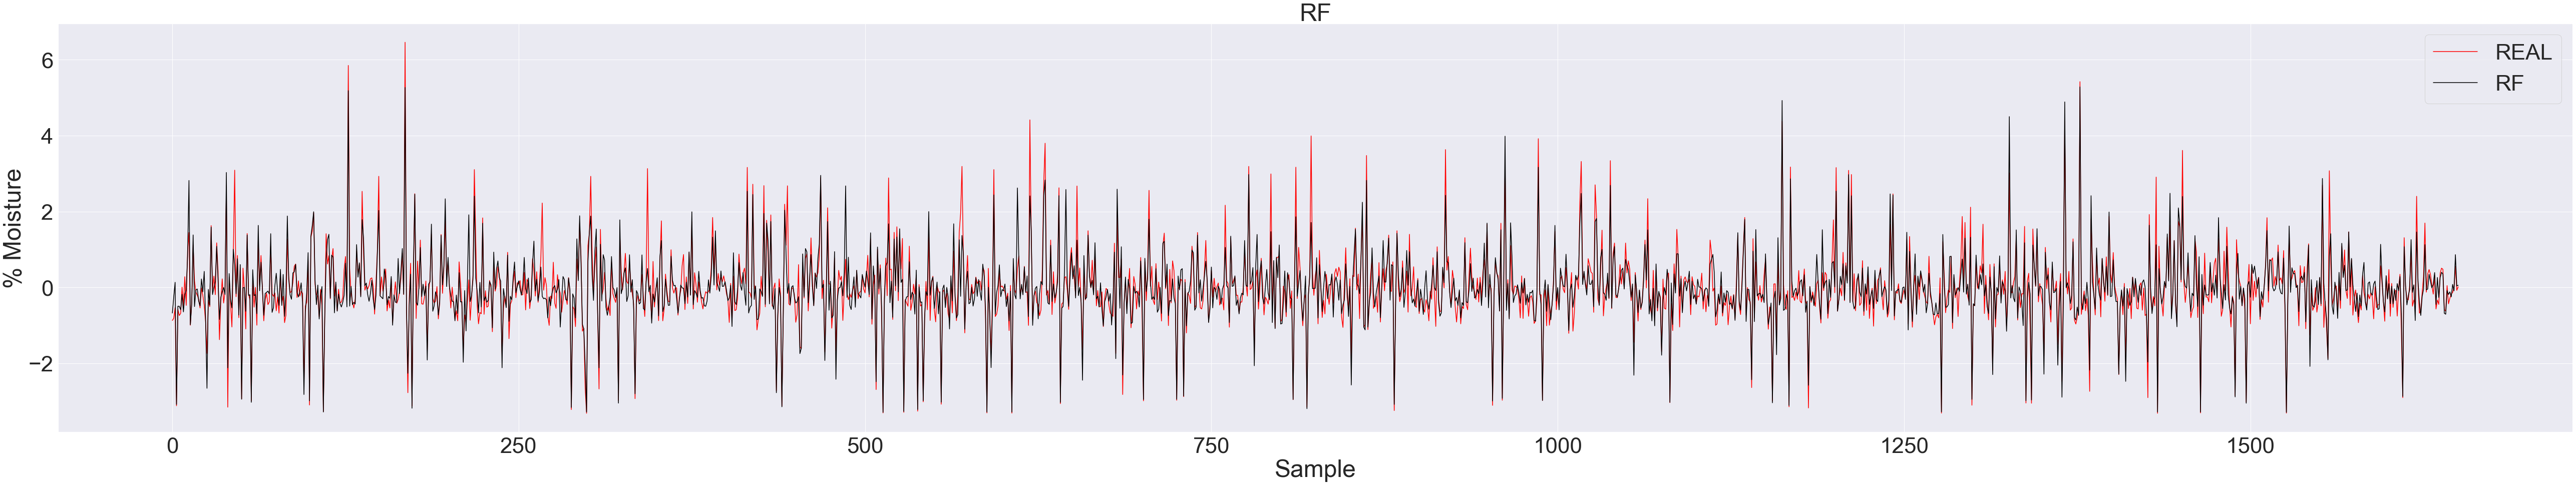

In [214]:
# Graph

sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'gray'})
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(90,15))
#ylim=(0,8251)
ax=sns.lineplot(y="REAL",x=range(0,1651) ,data=df_test, color="red") #REAL Values
sns.lineplot(y="RF_Pred",x=range(0,1651),data=df_test, color="black").set(title='RF') #Calibrated
plt.legend(labels = ['REAL', 'RF'])
ax.set(ylabel="% Moisture",xlabel="Sample")
plt.show()

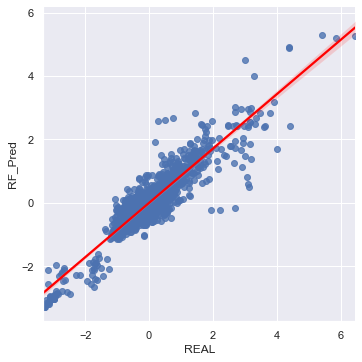

In [215]:
# Improved Scatter Plot

sns.set(font_scale=1)

sns.lmplot(x = 'REAL', y = 'RF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'red'})

plt.show()

#### SVM

C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Loss functions:
* R-squared = 0.66219451516486
* RMSE = 0.35644973758291854
* MAE = 0.36573867103228014
Loss functions:
* R-squared = 0.7128744897117888
* RMSE = 0.30297262001397807
* MAE = 0.362974530086667
Loss functions:
* R-squared = 0.7309811647002264
* RMSE = 0.2838665964653147
* MAE = 0.3451666666189513


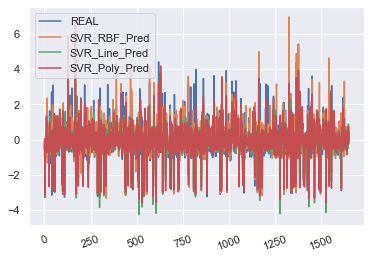

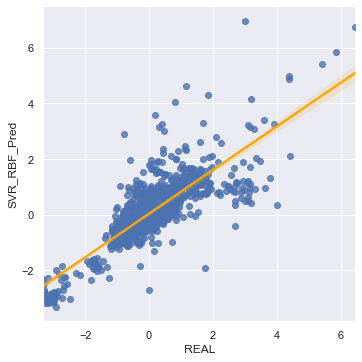

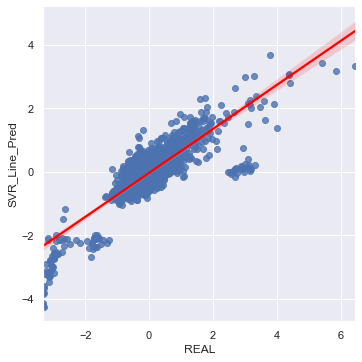

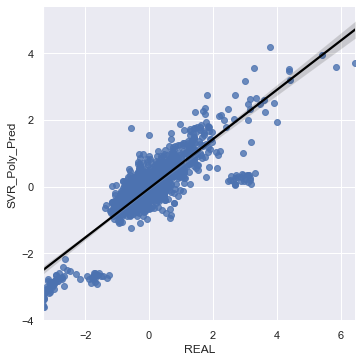

In [605]:
from sklearn.svm import SVR

# Models
svr_rbf = SVR(kernel = 'rbf', C = 1e3)#, gamma=0.1)
svr_lin = SVR(kernel = 'linear', C = 1e3)
svr_poly = SVR(kernel = 'poly', C = 1e3, degree = 2)

# Fit
svr_rbf.fit(X_train_scaled_DR_scaled, Y_train_scaled)
svr_lin.fit(X_train_scaled_DR_scaled, Y_train_scaled)
svr_poly.fit(X_train_scaled_DR_scaled, Y_train_scaled)

# Predict
df_test["SVR_RBF_Pred"] = svr_rbf.predict(X_test_scaled_DR_scaled)
df_test["SVR_Line_Pred"] = svr_lin.predict(X_test_scaled_DR_scaled)
df_test["SVR_Poly_Pred"] = svr_poly.predict(X_test_scaled_DR_scaled)

# Plot linear
sns.set(font_scale=1)
df_test[["REAL", "SVR_RBF_Pred", "SVR_Line_Pred", "SVR_Poly_Pred"]].plot()
plt.xticks(rotation=20)


# Plot regression
sns.set(font_scale=1)
sns.lmplot(x = 'REAL', y = 'SVR_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'})
sns.lmplot(x = 'REAL', y = 'SVR_Line_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'red'})
sns.lmplot(x = 'REAL', y = 'SVR_Poly_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'black'})

# Loss
loss_functions(y_true = df_test["REAL"], y_pred = df_test["SVR_RBF_Pred"])
loss_functions(y_true = df_test["REAL"], y_pred = df_test["SVR_Line_Pred"])
loss_functions(y_true = df_test["REAL"], y_pred = df_test["SVR_Poly_Pred"])



#### ANN


In [216]:
hidden_layer_sizes=(64,128,256)

activation ='relu'
solver = 'adam'
alpha=1e-4 # L2 penalty (regularization term) parameter, default 1e-5
learning_rate = 'adaptive'
early_stopping = True
tol = 1e-4
n_iter_no_change = 10


# include layer structure and activation function
if type(hidden_layer_sizes) == int: # single-layer case
    hidden_layer_sizes_string = str(hidden_layer_sizes)
else: # multi-layers case
    hidden_layer_sizes_string = str(hidden_layer_sizes)[1:-1].replace(', ','_')

structure = '_' + DR + str(n_components) +\
            '_' + hidden_layer_sizes_string +\
            '_' + activation

In [217]:
start_time = time.time()

regr = MLPRegressor(random_state = RANDOM_STATE,
                    hidden_layer_sizes = hidden_layer_sizes,
                    activation = activation,
                    solver = solver,
                    alpha = alpha,
                    learning_rate = learning_rate,
                    verbose = True,
                    early_stopping = early_stopping,
                    tol = tol,
                    momentum=0.9,
                    n_iter_no_change = n_iter_no_change
                    )
regr.fit(X_train_scaled_DR_scaled, Y_train_scaled)

print("--- %s seconds ---" % (time.time() - start_time))

C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


Iteration 1, loss = 0.22301559
Validation score: 0.753327
Iteration 2, loss = 0.10549985
Validation score: 0.760076
Iteration 3, loss = 0.09777269
Validation score: 0.791194
Iteration 4, loss = 0.08748470
Validation score: 0.793078
Iteration 5, loss = 0.08565184
Validation score: 0.791345
Iteration 6, loss = 0.08236933
Validation score: 0.803185
Iteration 7, loss = 0.09128323
Validation score: 0.786045
Iteration 8, loss = 0.07892989
Validation score: 0.808713
Iteration 9, loss = 0.07612924
Validation score: 0.801995
Iteration 10, loss = 0.07363997
Validation score: 0.815974
Iteration 11, loss = 0.07283355
Validation score: 0.789605
Iteration 12, loss = 0.07351774
Validation score: 0.812736
Iteration 13, loss = 0.06966975
Validation score: 0.801872
Iteration 14, loss = 0.06840979
Validation score: 0.788459
Iteration 15, loss = 0.06848975
Validation score: 0.802944
Iteration 16, loss = 0.06745372
Validation score: 0.812804
Iteration 17, loss = 0.06671187
Validation score: 0.810122
Iterat

In [218]:
regr.warm_start = True
regr.learning_rate_init /= 10 # default 0.001
regr.fit(X_train_scaled_DR_scaled, Y_train_scaled)

Iteration 46, loss = 0.05531490
Validation score: 0.812084
Validation score did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPRegressor(early_stopping=True, hidden_layer_sizes=(64, 128, 256),
             learning_rate='adaptive', learning_rate_init=0.0001,
             random_state=42, verbose=True, warm_start=True)

In [219]:
from sklearn.metrics import r2_score

Y_train_pred = scaler_y.inverse_transform(
    regr.predict( X_train_scaled_DR_scaled )
) # for train
# Y_train_pred = regr.predict( X_train_scaled_DR_scaled ) # for train
train_score = r2_score(Y_train, Y_train_pred)

Y_test_pred = scaler_y.inverse_transform(
    regr.predict( X_test_scaled_DR_scaled )
)# for test
# Y_test_pred = regr.predict( X_test_scaled_DR_scaled )# for test
test_score = r2_score(Y_test, Y_test_pred)

In [220]:
print(test_score)
print(train_score)

0.8696569747410037
0.8855039072185706


In [221]:
df_test['ANN']=regr.predict( X_test_scaled_DR_scaled )

In [222]:
loss_functions(df_test['REAL'],df_test['ANN'])

Loss functions:
* R-squared = 0.8696569747410037
* RMSE = 0.13753695317294007
* MAE = 0.2629089378165288


In [223]:
# ASSESMENT

loss_functions(df_test['REAL'],df_test['ANN'])

Loss functions:
* R-squared = 0.8696569747410037
* RMSE = 0.13753695317294007
* MAE = 0.2629089378165288


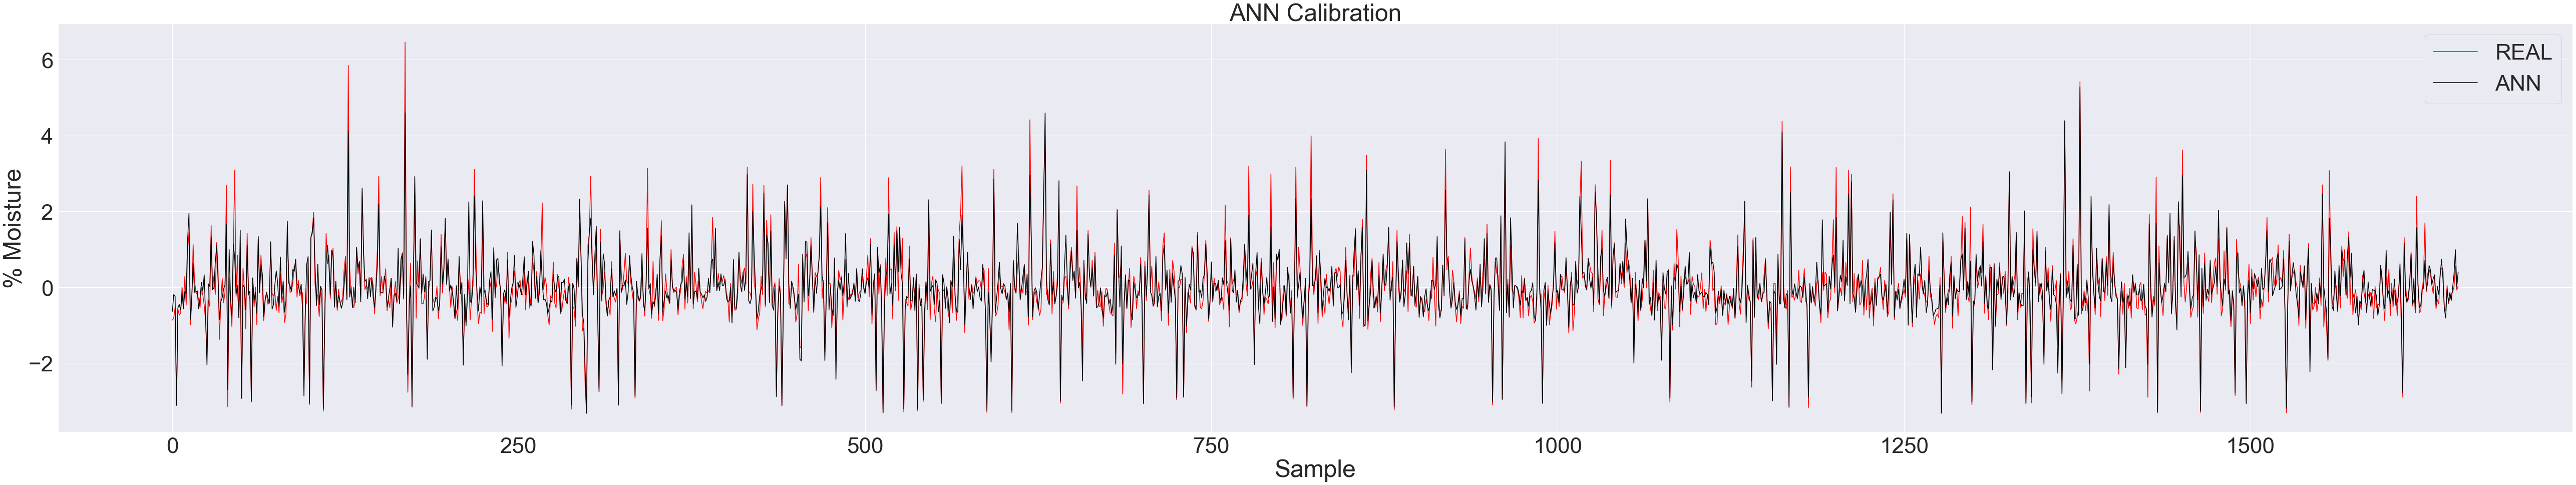

In [224]:
# Graph

sns.set(rc={'axes.facecolor':'gray', 'figure.facecolor':'gray'})
sns.set(font_scale=4)
fig, ax = plt.subplots(figsize=(90,15))
#ylim=(0,8251)
ax=sns.lineplot(y="REAL",x=range(0,1651) ,data=df_test, color="red") #REAL Values
sns.lineplot(y="ANN",x=range(0,1651),data=df_test, color="black").set(title='ANN Calibration') #Calibrated
plt.legend(labels = ['REAL', 'ANN'])
ax.set(ylabel="% Moisture",xlabel="Sample")
plt.show()

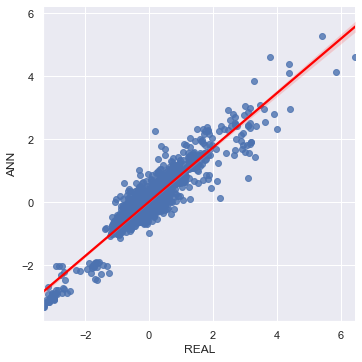

In [225]:
sns.set(font_scale=1)

sns.lmplot(x = 'REAL', y = 'ANN', data = df_test, fit_reg = True, line_kws = {'color': 'red'})

plt.show()

In [226]:
loss_functions(df_test['REAL'],df_test['ANN'])

Loss functions:
* R-squared = 0.8696569747410037
* RMSE = 0.13753695317294007
* MAE = 0.2629089378165288


#### Ridge Regression

In [227]:
from sklearn.linear_model import Ridge

In [228]:
model = Ridge(alpha=1.0)

In [229]:
model.fit(X_train_scaled_DR_scaled, Y_train_scaled)

Ridge()

In [230]:
df_test['Ridge_Pred']=model.predict(X_test_scaled_DR_scaled)

In [231]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Ridge

# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=5, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0.01, 0.99, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='explained_variance', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled_DR_scaled, Y_train_scaled)
# summarize
print('R2: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

R2: 0.730
Config: {'alpha': 0.98}


In [232]:
loss_functions(df_test['REAL'],df_test['Ridge_Pred'])

Loss functions:
* R-squared = 0.7198262736770087
* RMSE = 0.2956371512860351
* MAE = 0.3666430651339734


In [233]:
model = Ridge(alpha=0.98)
model.fit(X_train_scaled_DR_scaled, Y_train_scaled)

Ridge(alpha=0.98)

In [234]:
df_test['Ridge_Pred']=model.predict(X_test_scaled_DR_scaled)

In [235]:
loss_functions(df_test['REAL'],df_test['Ridge_Pred'])

Loss functions:
* R-squared = 0.7198263966793973
* RMSE = 0.295637021494865
* MAE = 0.36664309321004185


#### Lasso

In [486]:
from numpy import absolute
from pandas import read_csv
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import Lasso

In [511]:
# define model
model = Lasso()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = np.arange(0, 1, 0.01)
# define search
search = GridSearchCV(model, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X_train_scaled_DR_scaled, Y_train_scaled)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

MAE: -0.355
Config: {'alpha': 0.0}


C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  self.best_estimator_.fit(X, y, **fit_params)
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 869.1441805058046, tolerance: 0.66
  model = cd_fast.enet_coordinate_descent(


In [512]:
model = Lasso(alpha=0.0)

In [513]:
model.fit(X_train_scaled_DR_scaled,Y_train_scaled)

<ipython-input-513-c3fb1ad4d726>:1: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  model.fit(X_train_scaled_DR_scaled,Y_train_scaled)
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 869.1441805058046, tolerance: 0.66
  model = cd_fast.enet_coordinate_descent(


Lasso(alpha=0.0)

In [514]:
df_test['Lasso']=model.predict(X_test_scaled_DR_scaled)

In [515]:
loss_functions(df_test['REAL'], df_test['Lasso'])

Loss functions:
* R-squared = 0.6960772764846171
* RMSE = 0.26438050753963743
* MAE = 0.3466056663168901


#### Gaussian Process

RBF params {'alpha': 45, 'copy_X_train': True, 'kernel__k1': 1**2, 'kernel__k2': RBF(length_scale=1), 'kernel__k1__constant_value': 1.0, 'kernel__k1__constant_value_bounds': (1e-05, 100000.0), 'kernel__k2__length_scale': 1.0, 'kernel__k2__length_scale_bounds': (1e-05, 100000.0), 'kernel': 1**2 * RBF(length_scale=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Dot params {'alpha': 45, 'copy_X_train': True, 'kernel__k1': DotProduct(sigma_0=1), 'kernel__k2': WhiteKernel(noise_level=1), 'kernel__k1__sigma_0': 1.0, 'kernel__k1__sigma_0_bounds': (1e-05, 100000.0), 'kernel__k2__noise_level': 1.0, 'kernel__k2__noise_level_bounds': (1e-05, 100000.0), 'kernel': DotProduct(sigma_0=1) + WhiteKernel(noise_level=1), 'n_restarts_optimizer': 0, 'normalize_y': False, 'optimizer': 'fmin_l_bfgs_b', 'random_state': 0}
Loss functions:
* R-squared = -0.0005112646175566837
* RMSE = 1.0557317560895438
* MAE = 0.6713733763335521
Loss functions:
* R-squared 

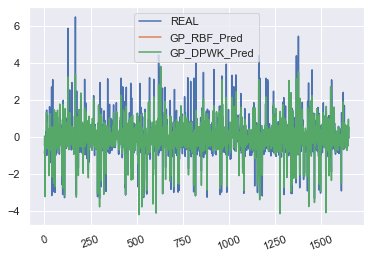

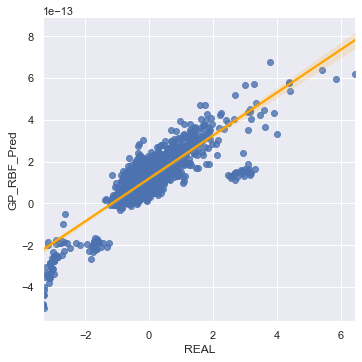

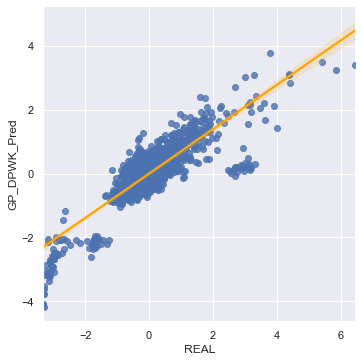

In [237]:
# %%
# Gaussian Process
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF, DotProduct, WhiteKernel

# Kernels definition
#rbf = ConstantKernel(constant_value=1.0, constant_value_bounds=(1e-10, 1e10)) * RBF(length_scale=1.0, length_scale_bounds=(1e-10, 1e10))
rbf = ConstantKernel() * RBF()
dpwh = DotProduct() + WhiteKernel()

# Models
gp_rbf = GaussianProcessRegressor(kernel = rbf, alpha = 45, random_state = 0)
gp_dpwh = GaussianProcessRegressor(kernel = dpwh, alpha = 45, random_state = 0)

# Fit
gp_rbf.fit(X_train_scaled_DR_scaled, Y_train_scaled)
gp_dpwh.fit(X_train_scaled_DR_scaled, Y_train_scaled)

# Predict
df_test["GP_RBF_Pred"] = gp_rbf.predict(X_test_scaled_DR_scaled)
df_test["GP_DPWK_Pred"] = gp_dpwh.predict(X_test_scaled_DR_scaled)

# Obtain optimized kernel parameters
# l = gp.kernel_.k2.get_params()['length_scale']
# sigma_f = np.sqrt(gp.kernel_.k1.get_params()['constant_value'])

# Print parameters
print("RBF params", gp_rbf.get_params())
print("Dot params", gp_dpwh.get_params())

# Plot linear
df_test[["REAL", "GP_RBF_Pred", "GP_DPWK_Pred"]].plot()
plt.xticks(rotation = 20)

# Plot regression
sns.lmplot(x = 'REAL', y = 'GP_RBF_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'})
sns.lmplot(x = 'REAL', y = 'GP_DPWK_Pred', data = df_test, fit_reg = True, line_kws = {'color': 'orange'})

# Loss
loss_functions(y_true = df_test["REAL"], y_pred = df_test["GP_RBF_Pred"])
loss_functions(y_true = df_test["REAL"], y_pred = df_test["GP_DPWK_Pred"])



#### Bayesian Ridge

In [238]:
from sklearn.linear_model import BayesianRidge

In [607]:
model = BayesianRidge()
model.fit(X_train_scaled_DR_scaled, Y_train_scaled)

# Model making a prediction on test data
prediction = model.predict(X_test_scaled_DR_scaled)

# Evaluation of r2 score of the model against the test set
print(f"r2 Score Of Test Set : {r2_score(Y_test_scaled, prediction)}")

C:\Users\bkari\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [ ]:
#These are the changes

In [608]:
#TEST

In [609]:
#Benjaminn

In [610]:
#nnjjnda